In 2012, Brittany Wenger, a 17-year old high school student from Florida, won first place in the Google Science Fair. She built [a cloud-based application](http://cloud4cancer.appspot.com/) that predicts whether a patient has breast cancer, based on attributes observed in a biopsy of breast tissue. Her classifier, based on a type of machine learning model called a _neural network_, was 97.4% accurate, with a 99.1% sensitivity to malignancy. You will learn what all of these terms mean in this chapter.

![](https://7aba0e11-a-6b960d83-s-sites.googlegroups.com/a/googlesciencefair.com/science-fair-2012-project-64a91af142a459cfb486ed5cb05f803b2eb41354-1333130785-87/the-question/fna-benign1.png?attachauth=ANoY7cplerSFMhG2lY-0UZu7_xj8aa9pK2GfmAaIfqMRR71uCpyCArRiaoQM0HD2xyK49q2fxGRnWO3rXOXSI3IZNigWU3Yz9rOyGOttuWYTyB-0lP8seBT1vHLwZlEz1CHrYNrP_MMWYej262SgMSHA7Zycq13KcEIL1BQjKrsCukhYM5Qr-77ZaoZl1LEFRePEjHDz6YH1-XG9IGfA2XGt9EZhw4nW7Kv8ArO6X5PIU1Yngv2CCbNkkB-R9P1ryl2UE6SokdyeCXIIwcx7VaTcMn9_WvGOnFYPRJNgz1Fv_MaCsMi2k9GFj6eAHIKr0YNLZEbe_YXFfh5XaLFwQ6kS6lN_AwvNXA%3D%3D&attredirects=0) ![](https://7aba0e11-a-6b960d83-s-sites.googlegroups.com/a/googlesciencefair.com/science-fair-2012-project-64a91af142a459cfb486ed5cb05f803b2eb41354-1333130785-87/the-question/fna-malignant1.png?attachauth=ANoY7cogzpoYrWJola-0cgKr0L93qNVRq_HJQoI8z6hNksYF2h0hw3fMlx2mVKma9DEtDO3JFJWrxA8AC7ZJKT0O72UCtHvlJ6sW_Y-sFQFGiglg1tXulHeVfze8HeMmEOlVcGfuD19HeadVPLZlJoi51H-TOIUTd9EpeqPj3lh_SBZ6q7Wsv9Tp2jm8I--hyN9VRV82k-qd-3xpz1KWzVDgEzcx6EkxK1ReMFOifeHYXsP4r_e_g1UEt435460e6kz34mV9QkvXgeqIGmBIvM9SX4uY0Q5WN0RBfGN41wJTw7TqzfO5qxACQw5R6vkeDqp8MquxqDy8rgxr79C8CHXqW0YbefRxwA%3D%3D&attredirects=0)

First, we read in the data that Brittany Wenger trained her classifier on.



In [1]:
import pandas as pd

df_breast = pd.read_csv("breast-cancer.csv")
df_breast.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


# K-Nearest Neighbors for Classification

In the previous chapter, we trained machine learning models to predict quantitative labels. Such models are called _regression models_ (or _regressors_). In this chapter, we will train machine learning models to predict categorical variables. In other words, the goal is to "classify" observations as belonging to one class or the other. These models are called _classification models_ (or _classifiers_).

We focus on just two features for now: **Clump Thickness** and **Uniformity of Cell Size**. Let's plot the training data, using color to represent the class label.

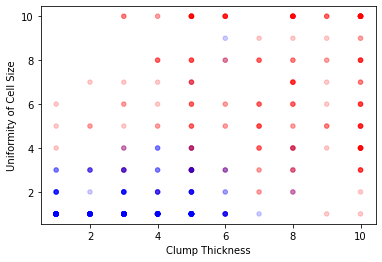

In [2]:
colors = df_breast["Class"].map({
    0: "blue",
    1: "red"
})

df_breast.plot.scatter(
    x="Clump Thickness", y="Uniformity of Cell Size", c=colors, 
    alpha=.2
);

Now, suppose that we have a new sample of breast mass with clump thickness 6 and uniformity of cell size 7, represented by a black circle on the plot below. Is this likely a malignant or a benign tumor?

![](https://github.com/dlsun/pods/blob/master/06-Classification-Models/classification.png?raw=1)

It is not hard to guess that this tumor is probably malignant, just by looking at the plot. The reasoning goes like this: most of the breast masses in the training data that were "close" to this one were malignant, so it makes sense to predict that this mass is also malignant. This is precisely the idea behind the $k$-nearest neighbors classifier:

1. Calculate the distance between the new point and each point in the training data, using some distance metric on the features.
2. Determine the $k$ closest points. Of these $k$ closest points, count up how many of each class label there are.
3. The predicted class of the new point is whichever class was most common among the $k$ closest points.

The only difference between the $k$-nearest neighbors classifier and the $k$-nearest neighbors regressor from the previous chapter is the last step. Instead of averaging the labels of the $k$ neighbors to obtain our prediction, we count up the number of occurrences of each category among the labels and take the most common one. It makes sense that we have to do something different because the label is now categorical instead of quantitative. This is yet another example of the general principle that was introduced in Chapter 1: the analysis changes depending on the variable type!

# Implementing K-Nearest Neighbors from Scratch

Let's classify the breast mass above using 10-nearest neighbors. First, we extract the training data and scale the features.

In [3]:
X_train = df_breast[["Clump Thickness", "Uniformity of Cell Size"]]
y_train = df_breast["Class"]

X_train_sc = (X_train - X_train.mean()) / X_train.std()

Next, we create a `Series` for the new breast mass, being sure to scale it in the exact same way.

In [4]:
x_new = pd.Series()
x_new["Clump Thickness"] = 6
x_new["Uniformity of Cell Size"] = 7

x_new_sc = (x_new - X_train.mean()) / X_train.std()
x_new_sc

<ipython-input-4-ddb2fcb66503>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_new = pd.Series()


Clump Thickness            0.552274
Uniformity of Cell Size    1.255795
dtype: float64

Now, we calculate the (Euclidean) distance between this new mass and each mass in the training data, and sort the distances from smallest to largest.

In [5]:
import numpy as np
dists = np.sqrt(((X_train_sc - x_new_sc) ** 2).sum(axis=1))
dists_sorted = dists.sort_values()
dists_sorted

3      0.326249
225    0.326249
304    0.326249
452    0.326249
499    0.326249
         ...   
116    2.640793
413    2.640793
113    2.640793
562    2.640793
354    2.640793
Length: 683, dtype: float64

The first 10 entries of this sorted list will be the 10 nearest neighbors. Let's get their index.

In [6]:
inds_nearest = dists_sorted.index[:10]
inds_nearest

Int64Index([3, 225, 304, 452, 499, 251, 566, 652, 434, 550], dtype='int64')

Now we can look up these indices in the original data.

In [7]:
df_breast.loc[inds_nearest]

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
3,1016277,6,8,8,1,3,4,3,7,1,0
225,1231387,6,8,7,5,6,8,8,9,2,1
304,709287,6,8,7,8,6,8,8,9,1,1
452,1299596,6,6,6,5,4,10,7,6,2,1
499,1306282,6,6,7,10,3,10,8,10,2,1
251,242970,5,7,7,1,5,8,3,4,1,0
566,878358,5,7,10,6,5,10,7,5,1,1
652,1350319,5,7,4,1,6,1,7,10,3,1
434,1193544,5,7,9,8,6,10,8,10,1,1
550,1331412,5,7,10,10,5,10,10,10,1,1


As a sanity check, notice that these examples all have a clump thickness near 6 and a uniformity of cell size near 7. To make a prediction for the new mass, we need to count up how many malignant and benign masses there were among these 10-nearest neighbors.

In [8]:
df_breast.loc[inds_nearest]["Class"].value_counts()

1    8
0    2
Name: Class, dtype: int64

There were more malignant tumors, by an 8 to 2 margin, so the 10-nearest neighbors model predicts that the breast is malignant.

As a measure of confidence in a prediction, classification models often report the predicted _probability_ of each label, instead of just the predicted label. The predicted probability of a class in a $k$-nearest neighbors model is simply the proportion of the $k$ neighbors that are in that class. In the example above, instead of simply predicting that the breast mass is malignant, we could have instead said that it has a $8/10 = .8$ probability of being malignant.

# K-Nearest Neighbors Classifier in Scikit-Learn

Now let's implement the same $10$-nearest neighbors model above using Scikit-Learn.

In [9]:
# Hint use the code provided in lecture as a sample
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_new_st = scaler.transform(pd.DataFrame([x_new]))
y_train = df_breast["Class"] 
        
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X=X_train_st, y=y_train)
model.predict(X=X_new_st)

array([0.8])

Using The Scikit-Learn Model we are able to get the predicted value of 0.8 or 80%.

What if we want the predicted probabilities? For classification models, there is an additional method, `.predict_proba()`, that returns the predicted probability of each class. The instance we want to predict has clump thickness 6 and uniformity of cell size 7. What is the class for this instance?

In [10]:
# hint use the code provided in lecture as a sample. To do a prediction, its a 1 line code. 
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X=X_train_st, y=y_train)
model.predict_proba(X=X_new_st)

array([[0.2, 0.8]])

The model predicited that the percentage of 0 will be 20% and 1 will be 80%, which match our previous results. 

# Part 2

1\. The wines data set (wines.csv ) contains data about the chemical composition of various wines. We want to predict the color (red or white) of a wine with the following features.

- fixed acidity: 11
- volatile acidity: 0.3
- citric acid: 0.3
- residual sugar: 2
- chlorides: 0.08
- free sulfur dioxide: 17
- total sulfur dioxide: 60
- density: 1.0
- pH: 3.2
- sulphates: 0.6
- alcohol: 9.8
- quality: 6

Train a 15-nearest neighbors model to predict the color of this wine from just it fixed acidity and volatile acidity. Then, train another 15-nearest neighbors model using all of the features. Does the predicted label change? Do the predicted probabilities of the labels change?

In [11]:
# TODO
wine_df = pd.read_csv("wines.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
X_train = wine_df[["fixed acidity","volatile acidity"]]
y_train = wine_df["color"]

X_new = pd.Series()
X_new["fixed acidity"] = 11
X_new["volatile acidity"] = 0.3

X_train_st = scaler.fit_transform(X_train)
X_new_st = scaler.transform(pd.DataFrame([X_new]))

model = KNeighborsClassifier(n_neighbors=15)
model.fit(X=X_train_st, y=y_train)
model.predict_proba(X=X_new_st)


<ipython-input-12-7e1262df73af>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_new = pd.Series()


array([[1., 0.]])

For the 15 nearest neighbors model, the wine with those specific stats have 100% of being red wine. 

In [13]:
X_new = pd.Series()
X_new["fixed acidity"] = 11
X_new["volatile acidity"] = 0.3
X_new["citric acid"] = 0.3
X_new["residual sugar"] = 2
X_new["chlorides"] = 0.08
X_new["free sulfur dioxide"] = 17
X_new["total sulfur dioxide"] = 60
X_new["density"] = 1.0
X_new["pH"] = 3.2
X_new["sulphates"] = 0.6
X_new["alcohol"] = 9.8
X_new["quality"] =  6

X_train = wine_df.iloc[:,:-1]
X_train_st = scaler.fit_transform(X_train)
X_new_st = scaler.transform(pd.DataFrame([X_new]))

model = KNeighborsClassifier(n_neighbors=15)
model.fit(X=X_train_st, y=y_train)
model.predict_proba(X=X_new_st)

<ipython-input-13-36a36524232a>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_new = pd.Series()


array([[1., 0.]])

After involving the other data types the result remains the same, it shows that the other data has no corelation to the wine's color other than fixed acidity volatile acidity. 


2\. Build a 5-nearest neighbors model to predict whether or not a passenger on a Titanic would survive, based on their age, sex, and class. Use the Titanic data set (titanic.csv ) as your training data. Then, use your model to predict whether a 20-year old female in first-class would survive. What about a 20-year old female in third-class?

In [18]:
# TODO
titanic_df = pd.read_csv("titanic.csv")
passengers = ["1st", "2nd","3rd"]
titanic_df = titanic_df.loc[titanic_df["class"].isin(passengers)] #data cleaning to eliminate crew 

titanic_df['gender'] = titanic_df['gender'].replace(["female", "male"], [0,1]) #replace str with int
titanic_df['class'] = titanic_df['class'].replace(["1st", "2nd", "3rd"], [1,2,3])

titanic_df = titanic_df.dropna(subset=['gender', 'age','class'])
titanic_df

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",1,42.0,3,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",1,13.0,3,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",1,16.0,3,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",0,39.0,3,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",0,16.0,3,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",0,24.0,2,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",1,22.0,3,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",1,27.0,3,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",1,25.0,3,C,Lebanon,2620.0,7.0406,1


Data cleaning: remove crew from passenger list, drop rows with missing critical data such as gender, age and class. Replace class type stre to int for scaler model

In [17]:
X_train = titanic_df[["gender", "age", "class"]]
y_train = titanic_df["survived"]

X_new = pd.Series()
X_new["age"] = 20
X_new["gender"] = 0
X_new["class"] = 1

X_train_st = scaler.fit_transform(X_train)
X_new_st = scaler.transform(pd.DataFrame([X_new]))

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X=X_train_st, y=y_train)
model.predict(X=X_new_st)


<ipython-input-17-4cfa5af0120e>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_new = pd.Series()


array([1.])

The 20 year old female in first class has 100% of surviving 

In [16]:
X_new = pd.Series()
X_new["age"] = 20
X_new["gender"] = 0
X_new["class"] = 3

X_new_st = scaler.transform(pd.DataFrame([X_new]))
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X=X_train_st, y=y_train)
model.predict(X=X_new_st)


<ipython-input-16-534fa5fe504b>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_new = pd.Series()


array([0.4])

The 20 year old female in first class has 40% of surviving 